# LSTM Plus Attention

In [1]:
from keras.layers import Input, Embedding, Dense, LSTM, merge, Activation, Permute, Reshape
from keras.layers import Convolution1D, MaxPooling1D, Flatten, TimeDistributed, RepeatVector
from keras.layers.convolutional import AveragePooling1D
from keras.models import Model

max_doclen = 12
word_dim, vocab_size = 5, 10

nb_class = 2

input = Input(shape=[max_doclen], dtype='int32')

# embedding
embedded = Embedding(output_dim=word_dim,
                     input_dim=vocab_size,
                     input_length=max_doclen,
                     weights=None)(input)

# lstm the document
activations = LSTM(16, return_sequences=True)(embedded)

# attention mask
mask = TimeDistributed(Dense(1))(activations)
mask = Reshape([max_doclen])(mask)
mask = Activation('softmax')(mask)
mask = RepeatVector(16)(mask)
mask = Permute([2, 1])(mask)

# apply mask
activations = merge([activations, mask], mode='mul')
activations = AveragePooling1D(pool_length=max_doclen)(activations)
activations = Flatten()(activations)

probas = Dense(nb_class, activation='softmax')(activations)

# compile
model = Model(input=input, output=probas)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Using Theano backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 12)            0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 12, 5)         50          input_1[0][0]                    
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 12, 16)        1408        embedding_1[0][0]                
____________________________________________________________________________________________________
timedistributed_1 (TimeDistribute(None, 12, 1)         17          lstm_1[0][0]                     
___________________________________________________________________________________________

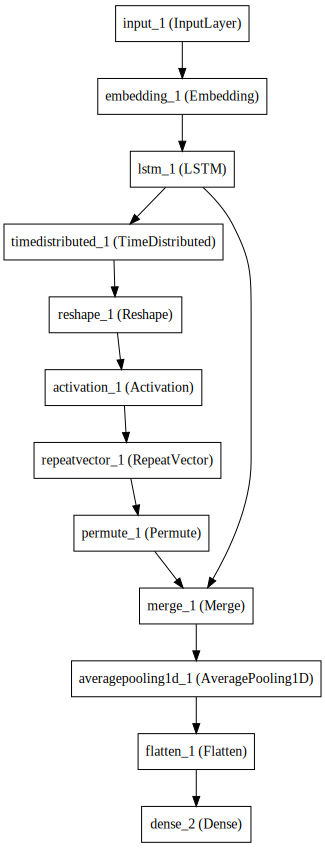

In [2]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [207]:
from keras.utils.np_utils import to_categorical

X_train = np.array([[4, 2, 1, 2, 4, 2, 3, 1, 2, 3, 2, 1],
                    [4, 2, 1, 2, 4, 2, 3, 1, 2, 3, 2, 1]])
y = to_categorical([1, 0])

model.fit(X_train, y)

Epoch 1/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 2/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 3/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 4/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 5/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 6/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 7/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 8/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 9/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
Epoch 10/10
2/2 [==============================] - 0s - loss: 0.6931 - acc: 0.5000
